# The Circle of Life: The Mathematics of Predator-Prey Dynamics

Rebecca M Brady1,2, John S Butler1,2, * 
 
1 School of Mathematical Sciences, Technological University Dublin, City Campus, Dublin 
2 ESHI (Environmental Sustainability and Health Institute), Technological University Dublin, City Campus, Dublin 
 
* corresponding author  
John.s.butler@tudublin.ie 
 

-------

### Abstract 
Some animals hunt other animals in order to feed themselves; these are called predators. Animals who are hunted and eaten are known as prey. What do you think would happen if a predator was introduced to an ecosystem where the prey previously lived without fear of being hunted? Would the new predator eat all the prey animals until they go extinct? Actually, the relationship between predator and prey is far more interesting than this. In this article, we show what this relationship looks like over time and explain how scientists can make predictions about future population levels all using simple mathematics like addition, subtraction and multiplication.

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import matplotlib.gridspec as gridspec # subplots
import warnings
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

## Introduction 
###  Why do we study animal populations?  
Scientists need to collect information so they can understand how to protect the environment and the animals who live there.  They sometimes use mathematics to test theories they have about the animals or even try to predict the future! This is called mathematical modeling. Investigating and modeling the relationship between predator and prey helps scientists understand how their populations change over time.  To make a successful model we need to collect data, to see what is happening in the environment. Mathematics is used to model and predict what might happen. In this paper we will show how some simple mathematics like addition, subtraction and multiplication can be used to model the predator-prey relationship seen in the wild. 
 
### Data and Models 
But first, we need data!  
Good models start with good data. For the predator and prey relationship, data could be a record of how many animals are in each population at any given time. We will use predator-prey population data collected by a company that hunted both the predator and prey for their fur in the 19th and 20th centuries. The Hudson Bay Company made yearly records of the amount of Snow Lynx and Snowshoe Hare pelts they collected. Figure 1 shows their data for the number of hare pelts in green over time in the top row and the lynx pelts over time in red on the bottom row. The amount of hare or lynx pelts collected reflects the animals' populations. The data showed that some years there were more lynxes (predators) but fewer hares (prey) like 1927 while other years, like 1932 there were more hares but fewer lynxes.

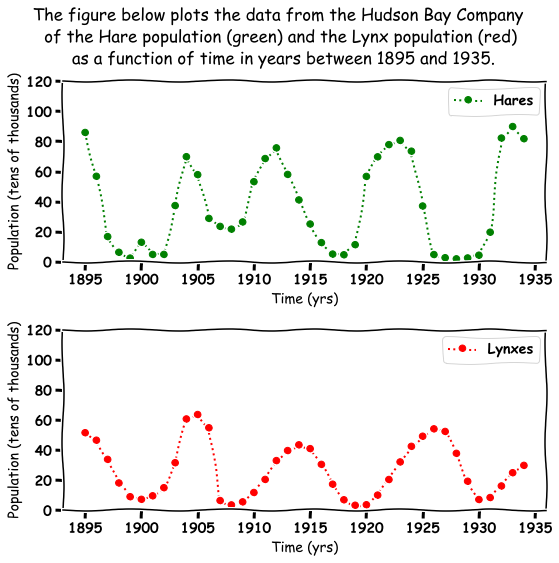

In [2]:
Pred_prey_data=pd.read_csv('hare_lynx_data.csv')  
fig = plt.figure(figsize=(8, 8))
grid = fig.add_gridspec(ncols=2, nrows=2)


with plt.xkcd():
    hare_ax= fig.add_subplot(grid[0,0:2])

    hare_ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Hare[50:-1],'o:',color='green',label='Hares')
    hare_ax.legend()
    hare_ax.set_ylim(0,120)
    hare_ax.set_xlabel('Time (yrs)')
    hare_ax.set_ylabel('Population (tens of thousands)')
    lynx_ax= fig.add_subplot(grid[1,0:2])
    lynx_ax.plot(Pred_prey_data.Year[50:-1],Pred_prey_data.Lynx[50:-1],'o:',color='red',label='Lynxes')

    lynx_ax.legend()
    lynx_ax.set_ylim(0,120)
    lynx_ax.set_xlabel('Time (yrs)')
    lynx_ax.set_ylabel('Population (tens of thousands)')
    plt.suptitle('The figure below plots the data from the Hudson Bay Company \n of the Hare population (green) and the Lynx population (red) \n as a function of time in years between 1895 and 1935.')
 
    #ax.legend(loc='best')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    plt.show()
    



<em><center> Figure 1: Hudson Bay Company data from 1895 to 1935: The top panel shows the change in hare (green) population in tens of thousands over the time. The bottom panel shows the lynx (red) population in tens of thousands. </center></em>
This kind of behaviour has been observed in many pairs of predators and prey from mammals to fish to beyond.

### What does the Hudson Bay Data tell us? 
The rise and fall in the hare and lynx population over time suggests that there is a relationship between the two animals, which makes sense as we know that lynxes eat hares. Can you see in Figure 1 that the population of the lynxes and the hares fall and rise at around the same time? Why do you think this happens? 
When there are more lynxes, they eat more hares which decreases the hare population. When the hare population is low, this means less food for the lynxes and results in a decrease in the lynx population. When the lynx population decreases, the hare population will increase again, and the up-down cycle will continue. If the predator and prey populations are balanced, they will go up and down over time. Up and down like waves, the question a mathematician asks is, “can I explain this using addition, subtraction and multiplication and can I predict the future?”. 
 
### Explaining the Relationship with Mathematical Models 
Mathematicians use differential equations to describe what people see in the world. They use data collected from the real world to inform their equations. The predator prey relationship was first described using differential equations by Lotka (1920) and Volterra (1926). They wanted to use mathematics to explain the rise and fall observed in the general predator-prey relationship. 
These equations can sometimes look very complicated but all they are is a way to describe how, what and why populations change. A famous mathematician called Leonhard Euler (1707-1783) showed that differential equations could just be written as plusses, minuses with a bit of multiplication. Next, we will show how differential equations can be used to model the populations of lynxes (predators) and hares (preys) using the data from the Hudson Bay Company. 

Modelling the Snowshoe Hare Population 
Before a mathematician develops an equation, they think about the world. So, let’s think about what is happening to the hare population over time. If there were no lynxes, then the hare population in the future, HF, is just equal to the current hare population, HC, plus births minus deaths, which we call the growth rate rgrowth and multiply it by the current population. This equation is shown in Figure 2A. 
Let’s use the Hudson Bay data to put numbers into the equation. We can read our initial values for the populations directly. When the data starts in 1895, the hare population is 85, so we will let HC = 85 hares. We can estimate a value for a growth rate of $r_{growth}=0.9$ in in a year this gives the future hare population HF in 1896 as, 
$$H_F= H_C + (r_{growth} × H_C), $$
$$H_F= 85 + (0.9×85) =161.5. $$
If the population keeps growing like this the entire world will be covered in hares, which is called exponential growth (Below). 

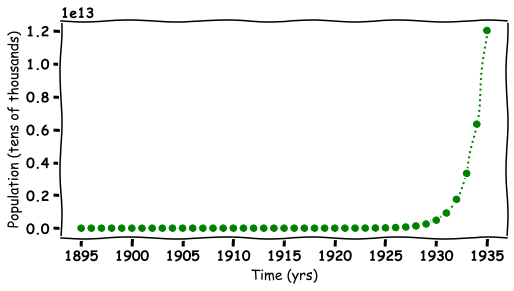

In [3]:
h=1
time=np.arange(1895,1935+h/2,h)


N=len(time) # Number of Steps
H=np.zeros(N) # Numerical Solution Hares
H[0]=85

for i in range (0,N-1):
    H[i+1]=H[i]+(0.9*H[i])# INSERT EQUATION HERE 

fig = plt.figure(figsize=(8, 4))


with plt.xkcd():
  
    plt.plot(time,H,'o:',color='green',label='Hares')
    plt.xlabel('Time (yrs)')
    plt.ylabel('Population (tens of thousands)')
    plt.show()
    




## Modelling the Snow Lynx Population 
Let’s next consider what is happening to the lynx population over time. If there are no hares the lynxes would have no food, then the lynx population will go down. To model this, we use subtraction, the future number of lynxes is equal to the current number of lynxes minus the death rate, $r_{death}$, times the current number of lynxes (Figure 2B). 
The lynx population in 1895 is LC=51 and we set the death rate to rdeath=0.25 then the equation gives, 
$$L_F= L_C - (r_{death}×L_C), $$
$$L_F =51 - (0.25×51) =38.25.$$ 
This is known as exponential decline and if it keeps happening there will be no lynxes (Figure 2B).  
 

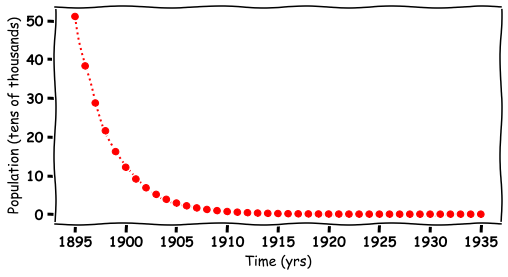

In [4]:
L=np.zeros(N) # Numerical Solution Hares
L[0]=51

for i in range (0,N-1):
    L[i+1]=L[i]+(-0.25*L[i])# INSERT EQUATION HERE 

fig = plt.figure(figsize=(8, 4))


with plt.xkcd():
  
    plt.plot(time,L,'o:',color='red',label='Lynx')
    plt.xlabel('Time (yrs)')
    plt.ylabel('Population (tens of thousands)')
    plt.show()

## Modelling the Hare and Lynx Interaction 
Let’s now consider how the hare and lynx populations interact with each other (Figure 2C). Lynxes eat the hares and so decrease the hare population; therefore, we use subtraction to model this. We need a term for the eat rate, reaten., which is multiplied by the lynx and hare populations in order to model how many hares are hunted and eaten by lynxes. By the same logic, the hares are a food source for the lynxes, so we use addition in the lynx equation and multiply the current hare population by the current lynx population times a food rate, rfood. 
The values of HC=85 hares, $r_{growth}=0.9$, $L_C=51$ lynxes and the $r_{Death}=0.25$ remain the same. From the data we get an eat rate of $r_{eaten}=0.024$ and a food rate of $r_{food} =0.005$. Putting these numbers into the equation for predicting the future number of hares gives, 
$$HF= HC+ (r_{growth}× HC) - (r_{eaten} × LC× HC),$$ 
$$HF= 85+ (0.9×85) – (0.024×85×51) =59.24, $$
and the equation for predicting the future number of lynxes now gives, 
$$LF= LC - (r_{Death}×LC ) + (r_{food} ×LC × HC ), $$
$$LF= 51 - (0.25×51) + (0.005×51×85) =59.925. $$
We calculate a decrease in the hare population and an increase in the lynx population in 1896 just as shown in Figure 3 by the green and red arrows. 
Using these equations for the lynx and hare populations we can model how they change over time by taking steps in time. The equations are set out above, so now we can use the Hudson Bay company data to estimate the rgrowth , rdeath, reaten, and rfood, using some computer code by de Silva et al.  (2020). This process alone could fill a whole paper! But for now, let’s see what our model looks like when we solve and graph it. 
 

In [5]:
r_growth=0.9
r_eaten=0.024
r_death=0.25 
r_food=0.005 

## Discrete Domain 
To numerically approximate the solution we discretise the continuous domain using a step size, $h=0.1$, 
which gives
\begin{equation}
t_i=1895+i h,
\end{equation}
for $i=0,...N$.
The figure below illustrate the discrete domain.

In [6]:
h=0.01
time=np.arange(1895,1935+h/2,h)


In [7]:
N=len(time) # Number of Steps
H=np.zeros(N) # Numerical Solution Hares
H[0]=Pred_prey_data.Hare[50]# Intial Hare population
L=np.zeros(N) # Numerical Solution Lynxes
L[0]=Pred_prey_data.Lynx[50]# Initial Lynx population

We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
H[i+1] = H[i]+ h*\big(r_{growth}*H[i]-r_{eaten}*H[i]*L[i] \big)
\end{equation}

\begin{equation}
L[i+1] = L[i]+ h*\big(-r_{feath}*H[i]+r_{food}*H[i]*L[i] \big)
\end{equation}
where $h$ is the stepsize and  $H[i]$ and $L[i]$ is the numerical approximation of the hare $H(t_i)$ and Lynx $L(t_i)$ at time $t_i$, for $i=0,...,N$


In [8]:
for i in range (0,N-1):
    H[i+1]=H[i]+h*(r_growth*H[i]-r_eaten*H[i]*L[i])# 
    L[i+1]=L[i]+h*(-r_death*L[i]+r_food*H[i]*L[i])# 

## Visualizing the Predator Prey-Relationship 
Using the Lotka-Volterra equations from above and some computer code (Brady and Butler, 2020), we simulate both the hare and lynx populations and make our own data showing how the predator prey relationship evolves over time (Figure below). The plots for the hare population (green) and lynx population (red) show the rise and fall that we saw earlier in the real data collected by the Hudson Bay company. 

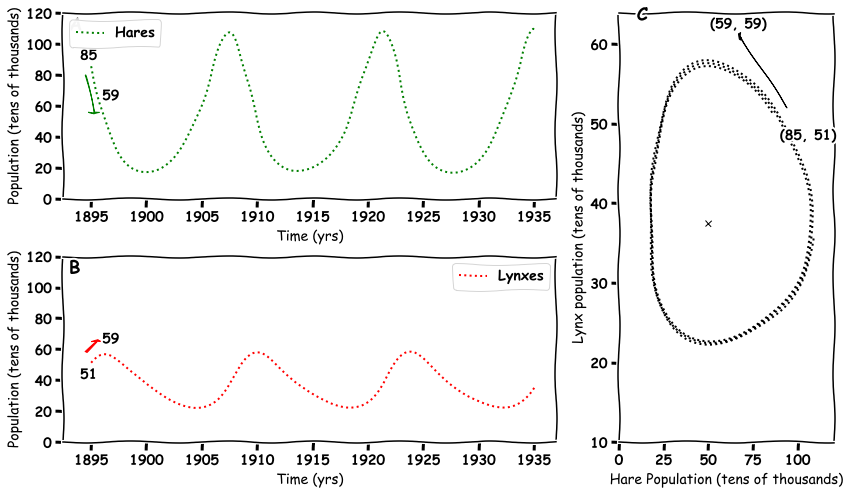

In [9]:
fig = plt.figure(figsize=(12, 8))
grid = fig.add_gridspec(ncols=3, nrows=2)


## Plotting Figure
with plt.xkcd():
    hare_ax= fig.add_subplot(grid[0,0:2])
    hare_ax.plot(time,H,':',color='green',label='Hares')
    hare_ax.legend()
    hare_ax.set_ylim(0,120)
    hare_ax.set_xlabel('Time (yrs)')
    hare_ax.set_ylabel('Population (tens of thousands)')
    hare_ax.text(1894,90, '85')
    hare_ax.text(1896,64, '59')
    hare_ax.text(1893,109, 'A',fontsize=18)
    hare_ax.arrow(1894.5, 80, 0.75, -24, head_width=1, head_length=1,color='green')
  
    lynx_ax= fig.add_subplot(grid[1,0:2])
    lynx_ax.plot(time,L,':',color='red',label='Lynxes')

    lynx_ax.legend()
    lynx_ax.set_ylim(0,120)
    lynx_ax.set_xlabel('Time (yrs)')
    lynx_ax.set_ylabel('Population (tens of thousands)')
    lynx_ax.text(1894,41, '51')
    lynx_ax.text(1896,64, '59')
    lynx_ax.text(1893,109, 'B',fontsize=18)
    lynx_ax.arrow(1894.5, 58, 1, 7, head_width=1, head_length=1,color='red')
    
    plt.subplots_adjust(top=0.85)
    orbit_ax= fig.add_subplot(grid[0:2,2])
    orbit_ax.plot(H,L,':',color='black')
    orbit_ax.plot( r_death/r_food,r_growth/r_eaten,'x',color='black')

    orbit_ax.set_ylabel('Lynx population (tens of thousands)')
    orbit_ax.set_xlabel('Hare Population (tens of thousands)')
    #ax.legend(loc='best')
    orbit_ax.set_ylim(10,1.1*np.max(L))
    orbit_ax.set_xlim(0,1.1*np.max(H))
  #  plt.tight_layout()
    orbit_ax.arrow(94, 52, -26, 9, head_width=1, head_length=1,color='black')
    orbit_ax.text(90, 48, '(85, 51)')
    orbit_ax.text(51, 62, '(59, 59)')
    orbit_ax.text(10, 63, 'C',fontsize=18)
  
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    plt.show()
    

# References

[1] Stover, Christopher and Weisstein, Eric W. "Population Growth." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/PopulationGrowth.html

[2]  Vito Volterra.  Fluctuations in the abundance of a species considered mathematically. Nature,118:558–560,1926.

[3] Alfred J Lotka.   Analytical note on certain rhythmic  relations inorganic  systems.Proceedings of the National Academy of Sciences,6(7):410–415,1920.

## Fitting the Original Data
Plotting the phase plane of original data

## Fitting the data with symfit

In [33]:
from symfit import variables, parameters, ODEModel, Fit, D
import numpy as np
from matplotlib import pyplot as plt
# define ODE model
r_growth, r_eat,  r_death,r_food = parameters('r_growth, r_eat,  r_death,r_food')
H, L, t = variables(' H, L, t')

model_dict = {
    D(H, t): r_growth * H - r_eat * H * L,
    D(L, t): -r_death * L + r_food*H * L
}

\begin{equation}
\begin{array}{cl}
D(x,t)=a x-bsx,\\
D(s,t)=-cs+dsx,\\
\end{array}
\end{equation}
where x- hare, s-lynx

In [39]:
ode_model = ODEModel(model_dict, initial={t:0.0,
                                          H:np.array(Pred_prey_data.Hare[50]),
                                          L:np.array(Pred_prey_data.Lynx[50])})
print(ode_model)

Derivative(H, t; r_death, r_eat, r_food, r_growth) = -r_eat*H*L + r_growth*H
Derivative(L, t; r_death, r_eat, r_food, r_growth) = -r_death*L + r_food*H*L


## Testing the fitting
To test the fit we first create an ideal example where know the exact answers.
a=9.0e-01, b=2.0e-02, c=2.3e-01,d=5.0e-03

# Fitting Real Data

In [40]:
tSample = np.array(Pred_prey_data.Year[50:-1]-Pred_prey_data.Year[50]) 

xHare = np.array(Pred_prey_data.Hare[50:-1])
sLynx = np.array(Pred_prey_data.Lynx[50:-1])

# constraints for parameters
r_growth.min = 0.0
r_eat.min = 0.0
r_death.min = 0.0
r_food.min = 0.0

# initial guesses for parameters
r_growth.value = 1

r_eat.value =0.02

r_death.value =0.25
r_food.value = 0.0045
# perform fitting
fit = Fit(ode_model, t=tSample, H=xHare, L=sLynx)
fit_result = fit.execute()

# show fit
print(fit_result)
print(fit_result.covariance_matrix)


Parameter Value        Standard Deviation
r_death   3.558084e-01 1.695178e-01
r_eat     1.685850e-02 7.054637e-03
r_food    7.632622e-03 3.588096e-03
r_growth  6.054941e-01 2.820378e-01
Status message         b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Number of iterations   54
Objective              <symfit.core.objectives.LeastSquares object at 0x7fc8c3a239d0>
Minimizer              <symfit.core.minimizers.LBFGSB object at 0x7fc8c3a23290>

Goodness of fit qualifiers:
chi_squared            54698.303505566466
objective_value        27349.151752783233
r_squared              -0.11557045526032028
[[ 2.87362739e-02 -1.13135079e-03  5.87155599e-04 -4.74735580e-02]
 [-1.13135079e-03  4.97679003e-05 -2.27456210e-05  1.89348279e-03]
 [ 5.87155599e-04 -2.27456210e-05  1.28744301e-05 -9.46248164e-04]
 [-4.74735580e-02  1.89348279e-03 -9.46248164e-04  7.95453156e-02]]


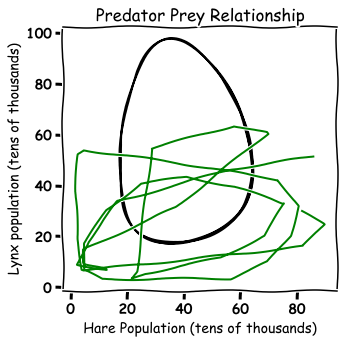

In [41]:
tSample=np.arange(0,35+h/2,h)
sLynxFit, xHareFit = ode_model(t=tSample, r_growth=fit_result.params['r_growth'], r_eat=fit_result.params['r_eat'],
                             r_death=fit_result.params['r_death'],r_food=fit_result.params['r_food'])



with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(5,5))

    ax = fig.add_subplot(1,1,1)

    ax.plot(xHareFit,sLynxFit,'-',color='black')
    ax.plot(xHare,sLynx,'-',color='green')


    ax.set_ylabel('Lynx population (tens of thousands)')
    ax.set_xlabel('Hare Population (tens of thousands)')
    #ax.legend(loc='best')
    ax.set_title('Predator Prey Relationship')
    plt.tight_layout()

    plt.show()

In [42]:
fit_result.params

OrderedDict([('r_death', 0.35580838155132294),
             ('r_eat', 0.01685849758937038),
             ('r_food', 0.007632622333710974),
             ('r_growth', 0.6054940803465151)])

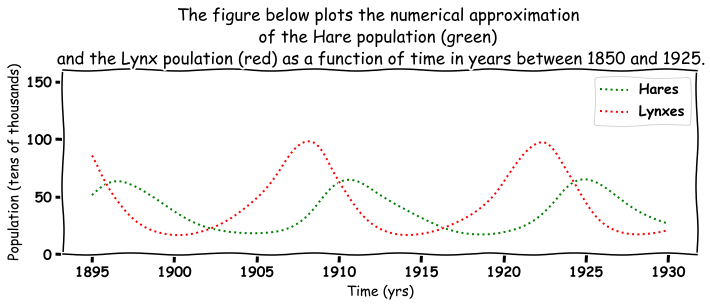

In [46]:
with plt.xkcd():
    ## Plotting Figure
    fig = plt.figure(1,figsize=(10,4))

    ax = fig.add_subplot(1,1,1)

    ax.plot(tSample+1895,xHareFit,':',color='green',label='Hares')
    ax.plot(tSample+1895,sLynxFit,':',color='red',label='Lynxes')

    ax.legend()
    ax.set_xlabel('Time (yrs)')
    ax.set_ylabel('Population (tens of thousands)')
    ax.legend(loc='best')
    ax.set_title('The figure below plots the numerical approximation \n of the Hare population (green)  \nand the Lynx poulation (red) as a function of time in years between 1850 and 1925.')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.ylim(0,160)
    plt.show()

